## Observations and Insights 

In [90]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as sts
import numpy as np
# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset

# Merge the two DataFrames together based on the Dates they share
all_mice_data = pd.merge(mouse_metadata, study_results, on="Mouse ID")

# Display the data table for preview
#all_mice_data.head()

In [91]:
#mouse_metadata.head()   # Shows you the mouse_metadata original columns pre merge

In [92]:
#study_results.head() # Shows you the study_results original columns pre merge

In [93]:
all_mice_data=pd.DataFrame(all_mice_data)
all_mice_data #.dtypes

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [94]:
#Remember, there are many ways to approach a data problem. The key is to break up your task into micro tasks. 
#Try answering questions like:

#How does my DataFrame need to be structured for me to have the right _x_-axis and _y_-axis?

#How do I build a basic scatter plot?

#How do I add a label to that scatter plot?

#Where would the labels for that scatter plot come from?

In [95]:
#all_mice_data.columns #show the names of the current columns

In [96]:
# Checking the number of mice. 
mice_count=len(all_mice_data["Mouse ID"].unique())
mice_count

249

In [97]:
#filter_mouse_ID=all_mice_data.loc[:, 'Mouse ID']== ['']
#all_mice_data.loc[:, "Mouse ID"].unique()
#Error lengths much match to compare

In [98]:
# create a filter_df where 'Mouse ID' is '?'

#filter_df=all_mice_data.loc[:, 'Mouse ID']=='False'

# df.drop() allows you to pass as argument a list or indices 
# we have to firstly use df[filter_df] to get a reduced df

#filtered_mouse=all_mice_data.drop(all_mice_data[filter_df].index)
#filtered_mouse
#filtered_mouse.count

In [99]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint.

# Check the data for any mouse ID with duplicate Timepoint
#PortlandCrime Solved  also #Cleaning Data 04-Pandas/2/Activities/03-Ins_CleaningData/Solved/CleaningData.ipynb
#duplicates= all_mice_data.duplicated(subset=(['Mouse ID', 'Timepoint']))
#duplicates= all_mice_data.duplicated(subset=(['Mouse ID']))
#duplicates.loc[True]
#duplicates.head() #Will show False 
#all_mice_data.loc[duplicates, 'Mouse ID']
#duplicates.count()

duplicate_mice_filter=all_mice_data.duplicated(subset=['Mouse ID', 'Timepoint'], keep=False)==True

# Optional: Get all the data for the duplicate mouse ID. 
duplicate_mice_study_df=all_mice_data.loc[duplicate_mice_filter,:]
duplicate_mice_ID=duplicate_mice_study_df['Mouse ID'].unique()
duplicate_mice_ID
#duplicate_mice_filter.head()

# Getting the unqiue mice by ID number that shows up for Mouse Id and Timepoint:
#unique_mice_filter=all_mice_data.duplicated(subset=["Mouse ID", "Timepoint"], keep=False)==True


#unique_mice_study=all_mice_data.loc[unique_mice_filter,:]
#unique_mice_study.head(10)
#unique_mice_study=all_mice_data.df.drop(duplicate_mice_id,0)

array(['g989'], dtype=object)

In [100]:
#Create a clean DataFrame by dropping the duplicate mouse by its ID
duplicate_mouse=all_mice_data.loc[all_mice_data.duplicated(subset=["Mouse ID", "Timepoint"]), "Mouse ID"].unique()
#test=all_mice_data(all_mice_data["Mouse ID"]=='g989'
#test
cleaned_df=all_mice_data[all_mice_data["Mouse ID"].isin(duplicate_mouse)==False]
cleaned_df  

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [101]:
# Checking the number of mice in the clean DataFrame
len(cleaned_df["Mouse ID"].unique())

248

In [102]:
#by default it removes duplicate rows based on all columns
#to remove duplicates on specific column(s), use subset
#to remove duplicates and keep last occurences, use keep
#df = pd.DataFrame({
#    'brand': ['Yum Yum', 'Yum Yum', 'Indomie', 'Indomie', 'Indomie'],
#    'style': ['cup', 'cup', 'cup', 'pack', 'pack'],
#     'rating': [4, 4, 3.5, 15, 5]
#})
#df

In [103]:
#To remove duplicates and keep last occurrences, use keep.
#df.drop_duplicates(subset=['brand', 'style'], keep='last')

#df.drop_duplicates(subset=['brand'])

In [104]:
#all_mice_data.dtypes

In [105]:
#clean_mice=all_mice_data.sort_values(by=['Mouse ID', 'Timepoint'])
#clean_mice.head()

In [106]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.

#clean_mice_data=df.drop_duplicates(subset=['Mouse ID', keep='False')
#clean_mice_data
# where to put the df you are calling. 
#the way to remember is whenever you see a method, look to the left of the .

#clean_mice_df = all_mice_data.drop_duplicates(subset=['Mouse ID'], keep="last")

#clean_mice_df = len(all_mice_data.drop_duplicates(subset=['Mouse ID'], keep=False))
#clean_mice_df = (all_mice_data.drop_duplicates(subset=['Mouse ID'], keep=False))

#clean_mice_df
#clean_mice is a new DataFrame, we will call this df for the statistical analysis

In [107]:
# Checking the number of mice in the clean DataFrame.
#clean_mice_count=len(all_mice_data["Mouse ID"].unique())
#clean_mice_count
# not accurate 


## Summary Statistics

In [108]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

#mean_clean_mice= np.mean(clean_mice_df.loc[:, "Tumor Volume (mm3)"]) #need to reference just the tumor volume (Series) for each regimen
#print(clean_mice_count["Tumor Volume (mm3)"].mean())
# 3:28 into MatPlotlib he mentions you can use pandas for mean and median

#mean_mice=cleaned_df["Tumor Volume (mm3)"].mean()
#mean_mice
print(f" The mean of the clean mice tumor volume is {mean_mice}")

 The mean of the clean mice tumor volume is 50.435293232255326


In [109]:
mean_tumor=cleaned_df["Tumor Volume (mm3)"].mean()
median_tumor=cleaned_df["Tumor Volume (mm3)"].median()
#var=st.variation(cleaned_df['Tumor Volume (mm3)'])
var=cleaned_df['Tumor Volume (mm3)'].var()
st_dev=st.tstd(cleaned_df['Tumor Volume (mm3)'])
sem=st.sem(cleaned_df['Tumor Volume (mm3)'])

print(f" The mean of the clean mice tumor volume is {mean_tumor}")
print(f" The median tumor volume is {median_tumor}")
#print(f" The tumor volume variance is {var}")
print(f" The tumor volume variance is {var}")
print(f"The tumor volume standard deviation is {st_dev}")
print(f"The tumor volume SEM is {sem}")

 The mean of the clean mice tumor volume is 50.435293232255326
 The median tumor volume is 48.933453655
 The tumor volume variance is 79.46290714557298
The tumor volume standard deviation is 8.91419694339166
The tumor volume SEM is 0.20559062186986257


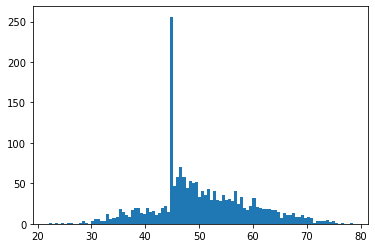

 The tumor volume mean is 54.99913687738955


In [110]:
plt.hist(cleaned_df.loc[:,"Tumor Volume (mm3)"], bins=100)
plt.show()
print(f' The tumor volume mean is {np.mean(clean_mice_df.loc[:, "Tumor Volume (mm3)"])}')

In [111]:
sts.normaltest(cleaned_df.loc[:,"Tumor Volume (mm3)"])
# this is not a normal distribution, .05% | (5%) is the threshold (p<.05) |=or
# pvalue is scientific notation, move the decimal to the left

NormaltestResult(statistic=27.586936387822888, pvalue=1.0222870917774587e-06)

In [112]:
#median_clean_mice= np.median(clean_mice_df.loc[:, "Tumor Volume (mm3)"])
#print(f" The median _____ is {median_numpy}")
#median_numpy =.np.mediean(some variable)
#median_clean_mice= np.median(clean_mice_df.loc[:, "Tumor Volume (mm3)"])

#median_tumor=cleaned_df["Tumor Volume (mm3)"].median()
#median_tumor
#print(f" The median tumor volume is {median_tumor}")

In [113]:
#use the 
var=st.variation(cleaned_df['Tumor Volume (mm3)'])
var
print(f" The tumor volume variance is {var}")

 The tumor volume variance is 0.17669820595557378


In [114]:
var_numpy=cleaned_df['Tumor Volume (mm3)']

#var_numpy =np.var(var_numpy, ddof=0) #take the number of dimensions minus 1 to determine the ddof
#var_numpy

var_numpy =np.var(var_numpy, ddof=1) #take the number of dimensions minus 1 to determine the ddof
var_numpy

# Delta Degrees of Freedom: int, default 1 
# start with the variance, this means you take negative values and make them absolute, in either direction it becomes a positive occurance
# standard deviation is a measure of distance, it doesn't care about the direction. 
# the variance will remove the negatives so you can find standard deviation
# if we wanted to figure out the standard deviation or the variance you would use a 1 for degress of freedom 
print(f" The tumor volume variance is {var_numpy}")

#var=cleaned_df['Tumor Volume (mm3)'].var()

 The tumor volume variance is 79.46290714557298


In [115]:
#df.var :Return unbiased variance over requested axis, Parameters: axis: [index[0], columns (1)] 
var=cleaned_df['Tumor Volume (mm3)'].var()
#var
print(f" The tumor volume variance is {var}")

 The tumor volume variance is 79.46290714557298


In [116]:
#df.std Return sample standard deviation over requested axis. Parameters: axis: [Index(0), columns(1)]
st_dev=st.tstd(cleaned_df['Tumor Volume (mm3)'])
st_dev
print(f"The tumor volume standard deviation is {st_dev}")

The tumor volume standard deviation is 8.91419694339166


In [117]:
#sd_numpy=cleaned_df['Tumor Volume (mm3)']
#sd_numpy = np.std(sd_numpy,ddof = 1)
#sd_numpy
#print(f"The tumor volume standard deviation is {sd_numpy}")

In [118]:
sem=st.sem(cleaned_df['Tumor Volume (mm3)'])
sem
print(f"The tumor volume SEM is {sem}")
#compute standard error of the mean 

The tumor volume SEM is 0.20559062186986257


In [119]:
#create a dictionary of list to hold the summary statstics
stat_sum= {"Tumor Mean ": [mean_tumor],
          " Tumor Median": [median_tumor],
          "variance": [var_numpy], #var_numpy not sure yet
           "st. deviation":[st_dev],
           "SEM": [sem]
          }
stat_sum=pd.DataFrame(stat_sum)
stat_sum

#all_mice_data=pd.DataFrame(all_mice_data)
#all_mice_data

,Tumor Mean,Tumor Median,variance,st. deviation,SEM
0,50.435293,48.933454,79.462907,8.914197,0.205591


In [126]:
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
drug_df=cleaned_df[['Drug Regimen', 'Tumor Volume (mm3)']]
drug_df=drug_df.groupby('Drug Regimen')

mean=drug_df.mean()
median=drug_df.median()
variance=drug_df.var()
std=drug_df.std()
sem=drug_df.sem()
# Assemble the resulting series into a single summary dataframe.

data={"Tumor Mean": mean['Tumor Volume (mm3)'],
     "Tumor Median": median['Tumor Volume (mm3)'],
      "Tumor Variance": variance['Tumor Volume (mm3)'],
     "Tumor Std Dev": std['Tumor Volume (mm3)'],
      "Tumor SEM": sem['Tumor Volume (mm3)']
     }
tumor_stats=pd.DataFrame(data)
tumor_stats

,Tumor Mean,Tumor Median,Tumor Variance,Tumor Std Dev,Tumor SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [127]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
data={"Tumor Mean": mean['Tumor Volume (mm3)'],
     "Tumor Median": median['Tumor Volume (mm3)'],
      "Tumor Variance": variance['Tumor Volume (mm3)'],
     "Tumor Std Dev": std['Tumor Volume (mm3)'],
      "Tumor SEM": sem['Tumor Volume (mm3)']
     }

# Using the aggregation method, produce the same summary statistics in a single line
agg_method=pd.aggregate(data,0)
agg_method

AttributeError: module 'pandas' has no attribute 'aggregate'

## Bar and Pie Charts

Text(0.5, 1.0, 'Number of Measurements per Treatement')

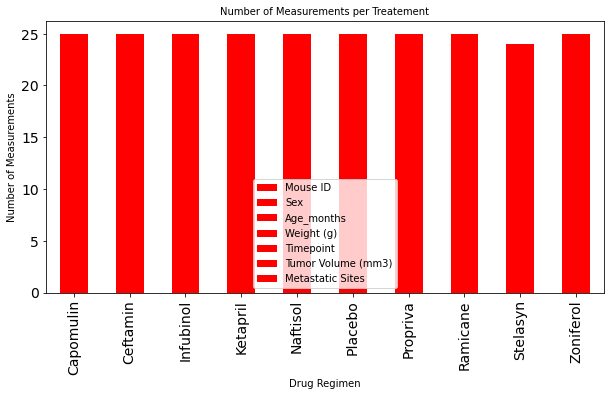

In [122]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pandas.

# pandas uses the .plot method #there are alot more methods available on plt 
# the formatting part you will have to mix and match. 
# x-axis different regimens 
# y- axis all the measurements w/ multiple measurements per mouse (clean_mice_df)
number_of_measurements=clean_mice_df.groupby(["Drug Regimen"]).count() #["Timepoint"]

###Stelasyn only has 24, the rest have 25

plot=number_of_measurements.plot.bar(figsize=(10,5), color='r', fontsize=14)
number_of_measurements
# when kind is 'bar' by default the x_axis is going to be the index of the data_frame, we assign it to a different Series "Drug Regimen" below.
# the columns will be the bars, unless we specifiy only one Series ('Number of Measurements')
# x_axis drug regimen will put each drug in its own respective column with a bar chart
plt.xlabel("Drug Regimen", fontsize= 10) #plt is plyplot 
#y label will show how many measurements were taken
plt.ylabel("Number of Measurements", fontsize=10)
# this will give you a nice title
plt.title("Number of Measurements per Treatement", fontsize=10)

# if need to save
# Save an image of the chart and print it to the screen
#plt.savefig("../Pymaceuticals-/num_measure_regimen.png")
#plt.show()

In [132]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pyplot.
number_of_measurements=clean_mice_df.groupby(["Drug Regimen"]).count()

x_axis=np.arange(number_of_measurements)

# x-axis different regimens  #y- axis all the measurements w/ multiple measurements per mouse (clean_mice_df)
#if you want to use the plt.plot method, remember you have to supply it with both the x and y axis 
# Unemployment 1:10 into Pandas 3
#clean_mice_df

plt.bar(x_axis, number_of_measurements, color='g', alpha=0.5, align="center")


#x_axis= clean_mice_df.keys()
#x_axis
#plt.plot(x_axis[["Drug Regimen"], number_of_measurements])
#Drug Regimen

ValueError: The truth value of a DataFrame is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

In [124]:
#mice_gender=clean_mice_df.loc[:, ['Sex']].groupby('Sex')
#mice_gender=clean_mice_df.loc[:, ['Mouse ID', 'Sex']].groupby('Sex')
#mice_gender.count()
#use df.loc[all rows, [2 Series]].group it by (the 'Sex' series)then count

#clean_mice_df.loc[:, 'Sex'].value_counts() #another way to see the m/f counts not in a table

In [135]:
# Find the value_counts of each sex. This will be useful/convenient as once you have it
# you can do a .plot() against it immediately after.
mice_gender=cleaned_df["Sex"]
mice_gender.value_counts()#.plot()

Male      958
Female    922
Name: Sex, dtype: int64

In [52]:
# Generate a pie plot showing the distribution of female versus male mice using pandas

# for pandas plot to work, the value_counts of the "Sex" column is all that's needed to for the pie plot data. 
# No need for mouse id. 

mice_gender_plot=mice_gender.plot.pie(suplots=True, figsize=(11,6))

cleaned_df.plot( x='Sex', kind='pie')
plt.show()



TypeError: '<' not supported between instances of 'str' and 'int'

In [129]:
#clean_mice_df.loc[:, ['Mouse ID', 'Sex']].groupby('Sex').count().plot(kind='bar')#Male/Female Bar Plot

In [95]:
#mice_sex=clean_mice_df['Sex']=clean_mice_df['Sex'].astype(float)
#mice_sex=clean_mice_df.loc[:,'Sex']=clean_mice_df['Sex'].astype(float)
#mice_sex.dtypes()
#this should have converted the 'Sex' Series to a float, us astype str to make it an object

In [90]:
#clean_mice_df.dtypes

ValueError: could not convert string to float: 'Male'

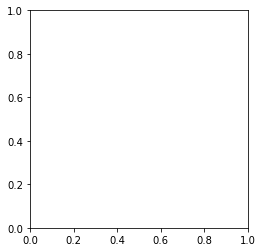

In [138]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
# create lables for our pie chart
labels=["Female", "Male"]
gender_diff=[mice_gender]
colors = ["red", "orange"]
explode=(0.1,0)
plt.pie(gender_diff,explode=explode, labels=labels, colors=colors)

# 05-Stu_BikeTrippin-Groupby/Unsolved we worked on this to get a pie chart for male/female bikeid


## Quartiles, Outliers and Boxplots

In [148]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
# Create a list of the drugs in the study
drugs_in_study=["Capomulin" , "Ramicane", "Infubinol","Ceftamin"]

# From Class Day 3 Matplotlib 3:25 into class. If the data is in a dataframe, we use pandas to give quartile calculations
#fourdrugs=clean_mice_df.quantile([.25,.5.75])

# here we are assigning the cleaned_dataframe to a variable drugs_in_study_df, within cleaned_dataframe the Drug Regimen Series 
# is it in the drugs_in_study list 
# if it is show me with a hanging object: drugs_in_study
drugs_in_study_df=cleaned_df[cleaned_df['Drug Regimen'].isin(drugs_in_study)]
#drugs_in_study

# Start by getting the last (greatest) timepoint for each mouse
# here we are assigning the max timepoint to the drugs_in_study_list we just made a df (drugs_in_study_df) and using the groupby method
# to look at the Series 'Mouse ID' and the Series 'Timepoint'. Find the highest timepoint for each Mouse ID
max_timepoint=drugs_in_study_df.groupby('Mouse ID')['Timepoint'].max()
#max_timepoint


# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
# we will create a new DataFrame called drug_in_study_max and we will assign using the pd.merge method the max_timepoint, 
#the cleaned_df, on the Mouse ID and Timepoint columns (these are each a Series)
drug_in_study_max=pd.merge(max_timepoint, cleaned_df, on=('Mouse ID', 'Timepoint'))
drug_in_study_max

#clean_data.groupby('Mouse')["Timepoint"].max()
# it will be a merge 
#pd.merge(max_timepoint, clean_data, on=['Mouse ID', 'Timepoint'])
# using the merge to use this type of filer is neat and this type of thinking is good.
# mastery over the merge concept will be fantastic for you. 

#is there a way in pandas to give us the row

# what is the last time point for the mouse

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a203,45,Infubinol,Female,20,23,67.973419,2
1,a251,45,Infubinol,Female,21,25,65.525743,1
2,a275,45,Ceftamin,Female,20,28,62.999356,3
3,a411,45,Ramicane,Male,3,22,38.407618,1
4,a444,45,Ramicane,Female,10,25,43.047543,0
...,...,...,...,...,...,...,...,...
95,y769,45,Ceftamin,Female,6,27,68.594745,4
96,y793,45,Capomulin,Male,17,17,31.896238,2
97,y865,45,Ceftamin,Male,23,26,64.729837,3
98,z578,45,Ramicane,Male,11,16,30.638696,0


In [14]:
# Put treatments into a list for for loop (and later for plot labels)


# Create empty list to fill with tumor vol data (for plotting)


# Calculate the IQR and quantitatively determine if there are any potential outliers. 

    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    
    
    # add subset 
    
    
    # Determine outliers using upper and lower bounds
    

In [15]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest


## Line and Scatter Plots

In [16]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin


In [17]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen

# MPG Unsolved notes on difference between plt and plot method using scattter plot method

## Correlation and Regression

In [18]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
